##  IDs: 313429607, 317225993


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 16:49:38 2020

@author: ravros
"""
import numpy as np
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_samples, silhouette_score


In [5]:
#functions defonotion
def readFile(fileName):
    file = open(fileName,'r',encoding="cp437")
    fileStr = ""
    for line in file:
        fileStr += line
    return fileStr
        
# Remove extra spaces
# Remove non-letter chars    
# Change to lower 
def preProcess(fileStr):
    fileStr = re.sub(" +"," ", fileStr)
    fileStr = re.sub("[^a-zA-Z ]","", fileStr)
    fileStr = fileStr.lower()
    return fileStr

#Divide the file in chuncks of the same size wind
def partition_str(fileStr, wind):
    n = wind
    chunks = [fileStr[i:i+n] for i in range(0, (len(fileStr)//n)*n, n)]
    #print(chunks)
    count = len(chunks)
    return chunks, count;

# result 1 + 2

In [6]:
fileContant = preProcess(readFile("text1.txt"))
#wind - chunks size 
wind = 5000
#Divide the each file into chunks of the size wind 
chunks, count = partition_str(fileContant, wind)
wordsSet =  set(fileContant.split())
stopWordsSet = set(readFile('stopwords_en.txt').split())
dictionary = wordsSet.difference(stopWordsSet)

In [7]:
# Count the number of dictionary words in files - Frequency Matrix
wordFrequency = np.empty((count,len(dictionary)),dtype=np.int64)
for i in range(count):
    print(i)
    for j,word in enumerate(dictionary):
        wordFrequency[i,j] = len(re.findall(word,chunks[i]))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


In [10]:
# find the distance matrix between the text files - Distance Matrix
dist = np.empty((count,count))
for i in range(count): 
    for j in range(count):
        # calculate the distance between the frequency vectors
        dist[i,j] = np.linalg.norm(wordFrequency[i,:]-wordFrequency[j,:])
# find the sum of the frequency colomns and select colomns having sum > 100
minSum = 100
sumArray =  wordFrequency.sum(axis=0)
indexArray = np.where(sumArray > minSum)

indexArraySize = len(indexArray[0])
wordFrequency1 = np.empty((count,indexArraySize),dtype=np.int64)

# generate a frequencey file with the selected coloumns 
for j in range(indexArraySize):
    wordFrequency1[:,j] = wordFrequency[:,indexArray[0][j]]

 # find the another distance matrix between the text files 
dist1 = np.empty((count,count))
for i in range(count): 
    for j in range(count):
        dist1[i,j] = np.linalg.norm(wordFrequency1[i,:]-wordFrequency1[j,:])
   
np.save('dist2',dist1,allow_pickle = True)  

# result 4

In [11]:
#finction clust
def clust(dist,n_cl):
 
#cluster the data into k clusters, specify the k  
    kmeans = KMeans(n_clusters = n_cl)
    kmeans.fit(dist)
    #labels_ = best_label // its the symbol for each point (vector) to which center 
    #from couple of seeds and its detail the number cluster
    labels = kmeans.labels_ +1
    # its will be shaped like [1,46(data vectors)] something like this yes 
#show the clustering results  
    fig = plt.figure()
    # defines the size of the plot in squares where [0,0,1,1] will be a regular plot
    ax = fig.add_axes([0,0,1,1])
    ax.bar(range(len(labels)),labels)
    plt.show()

# calculate the silhouette values  
    silhouette_avg_ = silhouette_score(dist, labels)
    sample_silhouette_values_ = silhouette_samples(dist, labels)
    print(silhouette_avg_)
# show the silhouette values 
    plt.plot(sample_silhouette_values_) 
    plt.plot([silhouette_avg_]*46, 'r--') #useless line
    plt.title("The silhouette plot for the various vectors.")
    plt.xlabel("data number ")
    plt.ylabel("silhouette value for each value")
    y=silhouette_avg_
    xmin=0
    xmax=len(labels)
# The vertical line for average silhouette score of all the values
    plt.hlines(y, xmin, xmax, colors='red', linestyles="--") 
    plt.show()

    print("For n_clusters =", n_cl,
      "The average silhouette_score is:", silhouette_avg_)
    return labels


# result 5 + 6 

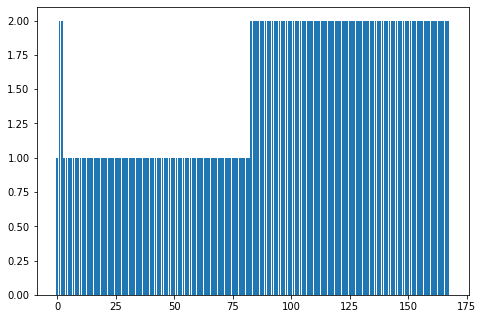

0.4712231608404145


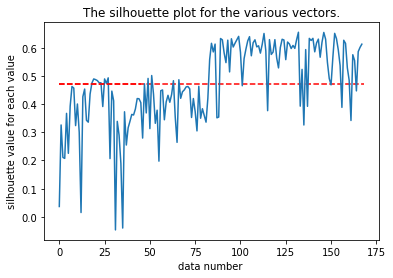

For n_clusters = 2 The average silhouette_score is: 0.4712231608404145


In [16]:
dist = np.load('dist2.npy')
labels = clust(dist1, 2)
lab = labels

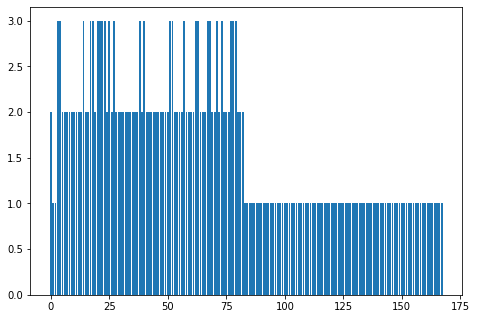

0.4006021543430056


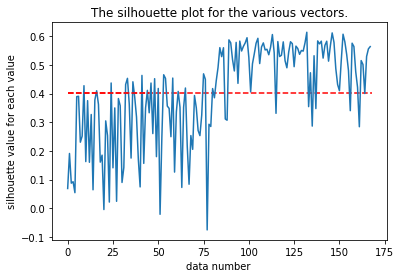

For n_clusters = 3 The average silhouette_score is: 0.4006021543430056


In [13]:
labels = clust(dist1, 3)

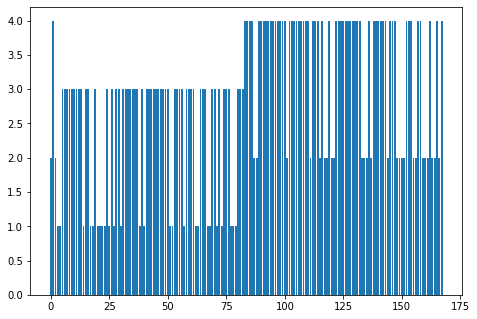

0.26073156331512976


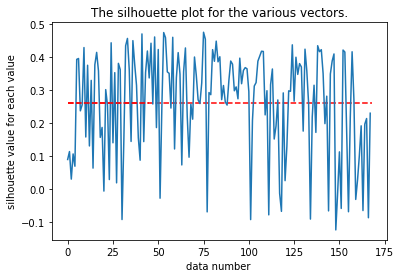

For n_clusters = 4 The average silhouette_score is: 0.26073156331512976


In [14]:
labels = clust(dist1, 4)

# result 7
after looking at the results we noticed that k=2 has an avg_silhoute = ~0.47 which is the highest among the Ks that we tested.$\\$
that's why there are probably 2 books.

# result 8 
in chunk 83 was the first time we noticed the begining of the second book and after 415000 charecters

In [27]:
strin = ""
for j,item in enumerate(lab):
   print("("+str(j)+","+str(item)+")")

(0,1)
(1,2)
(2,2)
(3,1)
(4,1)
(5,1)
(6,1)
(7,1)
(8,1)
(9,1)
(10,1)
(11,1)
(12,1)
(13,1)
(14,1)
(15,1)
(16,1)
(17,1)
(18,1)
(19,1)
(20,1)
(21,1)
(22,1)
(23,1)
(24,1)
(25,1)
(26,1)
(27,1)
(28,1)
(29,1)
(30,1)
(31,1)
(32,1)
(33,1)
(34,1)
(35,1)
(36,1)
(37,1)
(38,1)
(39,1)
(40,1)
(41,1)
(42,1)
(43,1)
(44,1)
(45,1)
(46,1)
(47,1)
(48,1)
(49,1)
(50,1)
(51,1)
(52,1)
(53,1)
(54,1)
(55,1)
(56,1)
(57,1)
(58,1)
(59,1)
(60,1)
(61,1)
(62,1)
(63,1)
(64,1)
(65,1)
(66,1)
(67,1)
(68,1)
(69,1)
(70,1)
(71,1)
(72,1)
(73,1)
(74,1)
(75,1)
(76,1)
(77,1)
(78,1)
(79,1)
(80,1)
(81,1)
(82,1)
(83,2)
(84,2)
(85,2)
(86,2)
(87,2)
(88,2)
(89,2)
(90,2)
(91,2)
(92,2)
(93,2)
(94,2)
(95,2)
(96,2)
(97,2)
(98,2)
(99,2)
(100,2)
(101,2)
(102,2)
(103,2)
(104,2)
(105,2)
(106,2)
(107,2)
(108,2)
(109,2)
(110,2)
(111,2)
(112,2)
(113,2)
(114,2)
(115,2)
(116,2)
(117,2)
(118,2)
(119,2)
(120,2)
(121,2)
(122,2)
(123,2)
(124,2)
(125,2)
(126,2)
(127,2)
(128,2)
(129,2)
(130,2)
(131,2)
(132,2)
(133,2)
(134,2)
(135,2)
(136,2)
(137,2)
(138,2

In [20]:
83*5000

415000

# result 9

In [51]:
def bookDetection(wind):
    prev = lab[0]
    counter = 0
    l = []
    prev_index = 0
    for j,item in enumerate(lab):
        if item != prev:
            counter += 1
        else:
            counter = 0
        if counter == 5:
            l.append((prev_index*wind,(j - 4)*wind))
            prev_index = j-4
            counter = 0
            prev = item
    l.append((prev_index*wind,j*wind))
    return l

In [53]:
bookDetection(wind)

[(0, 415000), (415000, 835000)]

the function returns list of tuples where each tuple has two elements , the first one is the begining of the book and the second one is the ending of the book 

and we can see that the function doesn't even need the k we found and can automaticly detect each book section and return a list of books.